In [1]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string
from nltk.stem.porter import PorterStemmer
import re

In [2]:
reviews= pd.read_json('amazon_one_plus_reviews.json', orient='str')
print(reviews)

                                                 product product_company  \
0      OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
1      OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
2      OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
3      OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
4      OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
...                                                  ...             ...   
30607  Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...           Redmi   
30608  Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...           Redmi   
30609  Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...           Redmi   
30610  Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...           Redmi   
30611  Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...           Redmi   

          profile_name                                       review_title  \
0         

In [3]:
reviews.head()

,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,total_comments,review_country,reviewed_at,url,crawled_at,_id,verified_purchase,color,style_name,size_name,category,sub_category,images
0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Nikhil,*Read before you buy!!*,5.0 out of 5 stars,"\n Yea..pre-ordered on 28 July, got it on 4 A...",721 people found this helpful,3,India,2020-08-04,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,45ca015a-2e39-5650-a174-ba966dd1e51f,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...
1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amit,Near to mid range Perfection,5.0 out of 5 stars,"\n Got it delivered yesterday , used for abou...",436 people found this helpful,1,India,2020-08-03,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,6820f8ae-f3cd-5783-b826-5e5805376047,Verified Purchase,na,na,na,electronics,mobiles,[]
2,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,aishwarya,Great price!,5.0 out of 5 stars,\n An amazing phone!,322 people found this helpful,1,India,2020-08-04,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,bea91c43-8d65-5ef5-ab04-595a5f5cc542,Verified Purchase,na,na,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...
3,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,vasu a.,Beast in OnePlus.,5.0 out of 5 stars,\n Brilliant..,243 people found this helpful,7,India,2020-08-02,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,76f68b53-5c52-56b2-9727-a5ab8c4bb4ff,Verified Purchase,na,na,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...
4,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amazon Customer,Changed to Nord from 6t,5.0 out of 5 stars,\n I was skeptical about changing from One pl...,109 people found this helpful,2,India,2020-08-04,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,22228681-b884-56a1-b04e-87167f6f76e6,Verified Purchase,na,na,na,electronics,mobiles,[]


In [4]:
reviews.shape

(30612, 20)

In [5]:
data_top=reviews.head(2) #to view the column names
data_top

,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,total_comments,review_country,reviewed_at,url,crawled_at,_id,verified_purchase,color,style_name,size_name,category,sub_category,images
0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Nikhil,*Read before you buy!!*,5.0 out of 5 stars,"\n Yea..pre-ordered on 28 July, got it on 4 A...",721 people found this helpful,3,India,2020-08-04,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,45ca015a-2e39-5650-a174-ba966dd1e51f,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...
1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amit,Near to mid range Perfection,5.0 out of 5 stars,"\n Got it delivered yesterday , used for abou...",436 people found this helpful,1,India,2020-08-03,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,6820f8ae-f3cd-5783-b826-5e5805376047,Verified Purchase,na,na,na,electronics,mobiles,[]


In [6]:
print("unique products: ", reviews['product'].nunique())
print("unique users: ", reviews['_id'].nunique())
print("unique reviews: ", reviews['_id'].nunique())
print("timeframe: ", reviews['reviewed_at'].min(), " - ", reviews['reviewed_at'].max())

unique products:  3
unique users:  24764
unique reviews:  24764
timeframe:  2019-11-06 00:00:00  -  2020-10-18 00:00:00


In [7]:
#product with most reviews
reviews.groupby(['product']).size().reset_index(name='counts').sort_values('counts',ascending=False).head()

,product,counts
1,"Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Stor...",13934
0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",9469
2,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",7209


In [8]:
#Check NA
reviews.isna().sum()

product              0
product_company      0
profile_name         0
review_title         0
review_rating        0
review_text          0
helpful_count        0
total_comments       0
review_country       0
reviewed_at          0
url                  0
crawled_at           0
_id                  0
verified_purchase    0
color                0
style_name           0
size_name            0
category             0
sub_category         0
images               0
dtype: int64

## Data pre-processing

In [9]:
#removing unnecessay columns
reviews=reviews.drop(['sub_category','category','size_name','style_name','color','images','total_comments','url','crawled_at'],axis=1)
print(reviews.head(2))

                                             product product_company  \
0  OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
1  OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   

  profile_name                   review_title       review_rating  \
0       Nikhil        *Read before you buy!!*  5.0 out of 5 stars   
1         Amit  Near to mid range  Perfection  5.0 out of 5 stars   

                                         review_text  \
0  \n  Yea..pre-ordered on 28 July, got it on 4 A...   
1  \n  Got it delivered yesterday , used for abou...   

                   helpful_count review_country reviewed_at  \
0  721 people found this helpful         India   2020-08-04   
1  436 people found this helpful         India   2020-08-03   

                                    _id  verified_purchase  
0  45ca015a-2e39-5650-a174-ba966dd1e51f  Verified Purchase  
1  6820f8ae-f3cd-5783-b826-5e5805376047  Verified Purchase  


In [10]:
# deal with n't
def n_apostrophe_t_handler(document):

    i = 0
    while i < len(document):
        if "n't" in document[i]:        
            # Checks to see if there is a following word after word ending in "n't"
            if (i+1) < len(document):
                document[i+1] = 'not_' + document[i+1]
                document.pop(i)
            else:
                document.pop(i)
        i+=1

    return(document)

In [11]:
# Extract the rating_column into numerical values alone
reviews['review_rating'] = reviews['review_rating'].str[:1]
reviews.head(3)

,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,review_country,reviewed_at,_id,verified_purchase
0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Nikhil,*Read before you buy!!*,5,"\n Yea..pre-ordered on 28 July, got it on 4 A...",721 people found this helpful,India,2020-08-04,45ca015a-2e39-5650-a174-ba966dd1e51f,Verified Purchase
1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amit,Near to mid range Perfection,5,"\n Got it delivered yesterday , used for abou...",436 people found this helpful,India,2020-08-03,6820f8ae-f3cd-5783-b826-5e5805376047,Verified Purchase
2,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,aishwarya,Great price!,5,\n An amazing phone!,322 people found this helpful,India,2020-08-04,bea91c43-8d65-5ef5-ab04-595a5f5cc542,Verified Purchase


In [12]:
# remove numbers
#input_str = ’Box A contains 3 red and 5 white balls, while Box B contains 4 red and 2 blue balls.’
def remove_number(document):
    result = re.sub(r'\d+', '', document)
    return result

In [14]:
# remove numbers
review_text = review_text.apply(remove_number)
print("numbers: ",review_text[4],"\n")

numbers:  
  i was skeptical about changing from one plus t to nord as  still have more processing power than  and g won't be available in india for next  years, nord has gorilla glass , whereas opt had gorilla glass . 



In [13]:
# convert text to lower case 
review_text = reviews["review_text"].str.lower()
print("original: ",review_text[4],"\n")

original:  
  i was skeptical about changing from one plus 6t to nord as 845 still have more processing power than 765 and 5g won't be available in india for next 2 years, nord has gorilla glass 5, whereas op6t had gorilla glass 6. 



In [15]:
 import nltk
# nltk.download('punkt')

In [16]:
# words Tokenization
review_text = review_text.apply(word_tokenize)
print("tokenization: ",review_text[4],"\n")

tokenization:  ['i', 'was', 'skeptical', 'about', 'changing', 'from', 'one', 'plus', 't', 'to', 'nord', 'as', 'still', 'have', 'more', 'processing', 'power', 'than', 'and', 'g', 'wo', "n't", 'be', 'available', 'in', 'india', 'for', 'next', 'years', ',', 'nord', 'has', 'gorilla', 'glass', ',', 'whereas', 'opt', 'had', 'gorilla', 'glass', '.'] 



In [17]:
# deal with negation
review_text = review_text.apply(n_apostrophe_t_handler)
print("negation: ",review_text[4],"\n")


negation:  ['i', 'was', 'skeptical', 'about', 'changing', 'from', 'one', 'plus', 't', 'to', 'nord', 'as', 'still', 'have', 'more', 'processing', 'power', 'than', 'and', 'g', 'wo', 'not_be', 'available', 'in', 'india', 'for', 'next', 'years', ',', 'nord', 'has', 'gorilla', 'glass', ',', 'whereas', 'opt', 'had', 'gorilla', 'glass', '.'] 



In [18]:
# remove punctuation
punctuations = list(string.punctuation)
review_text = review_text.apply(lambda x: 
           [i.strip("".join(punctuations)) for i in x if i not in punctuations])
print("punctuation: ", review_text[4],"\n")

punctuation:  ['i', 'was', 'skeptical', 'about', 'changing', 'from', 'one', 'plus', 't', 'to', 'nord', 'as', 'still', 'have', 'more', 'processing', 'power', 'than', 'and', 'g', 'wo', 'not_be', 'available', 'in', 'india', 'for', 'next', 'years', 'nord', 'has', 'gorilla', 'glass', 'whereas', 'opt', 'had', 'gorilla', 'glass'] 



In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\use\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# remove stop words 
stop_words=set(stopwords.words("english"))
review_text = review_text.apply(lambda x: 
                             [item for item in x if item not in stop_words])
print("stop words: ",review_text[4],"\n")

stop words:  ['skeptical', 'changing', 'one', 'plus', 'nord', 'still', 'processing', 'power', 'g', 'wo', 'not_be', 'available', 'india', 'next', 'years', 'nord', 'gorilla', 'glass', 'whereas', 'opt', 'gorilla', 'glass'] 



In [21]:
# word stemming
stemmer = PorterStemmer()
review_text = review_text.apply(lambda x: [stemmer.stem(y) for y in x])
print("stemming:  ",review_text[4],"\n")

stemming:   ['skeptic', 'chang', 'one', 'plu', 'nord', 'still', 'process', 'power', 'g', 'wo', 'not_b', 'avail', 'india', 'next', 'year', 'nord', 'gorilla', 'glass', 'wherea', 'opt', 'gorilla', 'glass'] 



In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\use\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
# lemmatizer
lemmatizer = WordNetLemmatizer()
review_text = review_text.apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
print("lemmatizer:  ",review_text[7],"\n")

lemmatizer:   ['hey', 'guy', 'wo', 'not_go', 'spec', 'detail', 'read', 'read', 'spec', 'got', 'nd', 'august', 'hour', 'use', 'say', 'decis', 'wait', 'worth'] 



In [24]:
# remove empty string
for i in range(len(review_text)):
    review_text[i] = [x for x in review_text[i] if x]
print("remove empty:  ",review_text[1],"\n")

remove empty:   ['got', 'deliv', 'yesterday', 'use', 'hour', 'tell', 'first', 'mid', 'ranger', 'previous', 'use', 'plu', 'edg', 'iphon', 'stone', 'age'] 



## Text vectorization

### Most frequent words

In [25]:
review_clean=review_text

In [26]:
from nltk import FreqDist
vec=[]
for i in range(len(review_clean)):
    for j in range(len(review_clean[i])):
        vec.append(review_clean[i][j]) 
freq = FreqDist(vec)

In [27]:
most_freq = pd.DataFrame(freq.most_common(500),columns=['Word','Frequency'])
most_freq.head()

,Word,Frequency
0,good,12157
1,phone,10786
2,camera,7406
3,batteri,5146
4,qualiti,3939


In [28]:
vocabulary = most_freq['Word'].tolist()

## Clean String

In [29]:
def listToString(s):  
    # initialize an empty string 
    str1 = ""  
    # traverse in the string   
    for ele in s:  
        str1 += ele + " " 
    # return string   
    return str1  

In [30]:
review_clean_str = review_clean.apply(listToString)

In [31]:
review_clean_str

0        yea pre-ord juli got august packag nice withou...
1        got deliv yesterday use hour tell first mid ra...
2                                              amaz phone 
3                                               brilliant 
4        skeptic chang one plu nord still process power...
                               ...                        
30607            qualiti phone great perspect expect high 
30608                                           recommend 
30609    redmi amazon engag worst market tactic flash s...
30610    face display retent problem use display minut ...
30611    front camera qualiti wors compar note pro when...
Name: review_text, Length: 30612, dtype: object

## Bag of words

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True, vocabulary = vocabulary)
cv.fit(review_clean_str)
X_bow = cv.transform(review_clean_str)

In [33]:
X_bow.toarray().shape

(30612, 500)

In [34]:
bag_of_words_df = pd.DataFrame(X_bow.toarray(), index = reviews['profile_name'], columns = vocabulary)
bag_of_words_df.head(10)

,good,phone,camera,batteri,qualiti,product,mobil,nice,best,price,...,finish,place,goe,memori,becom,latest,contact,plz,amount,everyon
profile_name,,,,,,,,,,,,,,,,,,,,,
Nikhil,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Amit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aishwarya,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vasu a.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amazon Customer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Manmohan Singh Tanwar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abhishek,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sahil kalsi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
shristi bhatt,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf_model = TfidfVectorizer(ngram_range = (1, 1), vocabulary = vocabulary).fit(review_clean_str)

In [37]:
result = pd.DataFrame({'word': tfidf_model.get_feature_names(), 'tfidf': list(tfidf_model.idf_)})

In [38]:
result.head()

,word,tfidf
0,good,2.106220
1,phone,2.275260
2,camera,2.557965
3,batteri,2.859917
4,qualiti,3.142437


### N-GRAMS

In [39]:
tfidf_ngram = TfidfVectorizer(ngram_range = (1, 2), max_features = 1000).fit(review_clean_str)

In [40]:
result2 = pd.DataFrame({'word': tfidf_ngram.get_feature_names(), 'tfidf': list(tfidf_ngram.idf_)})

In [41]:
result2.head()

,word,tfidf
0,abl,6.898363
1,absolut,6.628700
2,accord,6.818321
3,actual,7.038721
4,ad,6.851843


## SENTIMENT ANALYSIS

#### Sentiment analysis is done with MOST FREQUENTLY OCCURED text and PREPROCESSED DATA

In [42]:
reviews['review_clean_list'] = review_clean
reviews['review_clean_str'] = review_clean_str

In [43]:
#conda install -c conda-forge textblob

In [44]:
from textblob import TextBlob
# get the polarity of each text
reviews['polarity'] = reviews.review_clean_str.map(lambda text: TextBlob(text).sentiment.polarity)

# classify sentiment into positive and negative ones
reviews['sentiment'] = ''
reviews['sentiment'][reviews['polarity'] >= 0] = 'positive'
#test['sentiment'][test['polarity'] == 0] = 'neutral'
reviews['sentiment'][reviews['polarity'] < 0] = 'negative'

<ipython-input-44-dd7cf0d2d792>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment'][reviews['polarity'] >= 0] = 'positive'
<ipython-input-44-dd7cf0d2d792>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment'][reviews['polarity'] < 0] = 'negative'


In [45]:
reviews.head(2)

,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,review_country,reviewed_at,_id,verified_purchase,review_clean_list,review_clean_str,polarity,sentiment
0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Nikhil,*Read before you buy!!*,5,"\n Yea..pre-ordered on 28 July, got it on 4 A...",721 people found this helpful,India,2020-08-04,45ca015a-2e39-5650-a174-ba966dd1e51f,Verified Purchase,"[yea, pre-ord, juli, got, august, packag, nice...",yea pre-ord juli got august packag nice withou...,0.425000,positive
1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amit,Near to mid range Perfection,5,"\n Got it delivered yesterday , used for abou...",436 people found this helpful,India,2020-08-03,6820f8ae-f3cd-5783-b826-5e5805376047,Verified Purchase,"[got, deliv, yesterday, use, hour, tell, first...",got deliv yesterday use hour tell first mid ra...,0.027778,positive


In [46]:
reviews.groupby('sentiment').review_text.count()

sentiment
negative     2339
positive    28273
Name: review_text, dtype: int64

## Modeling

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn import metrics
from sklearn import model_selection
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, datasets
from sklearn.metrics import confusion_matrix

In [48]:
dummy_y = pd.get_dummies(reviews['sentiment'],drop_first=True)   #reduce one degree of freedom
reviews['dummy_y'] = dummy_y

In [49]:
x = bag_of_words_df
y = reviews['dummy_y']
X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.3, random_state=42)

### SVM CLASSIFICATION

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sqlite3
import pickle
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

## Using subset of data

In [51]:
data = reviews[['review_rating','sentiment', 'reviewed_at', 'review_clean_str','dummy_y','polarity']].copy()
data.sort_values('reviewed_at', inplace = True)
data.head(10)

,review_rating,sentiment,reviewed_at,review_clean_str,dummy_y,polarity
22185,3,positive,2019-11-06,ok,1,0.500000
14885,4,positive,2019-11-06,last year use mi phone nice phone budget price,1,0.300000
9470,5,positive,2019-11-06,love phone purchas bank discount gb gb blue va...,1,0.277778
9469,5,positive,2019-11-06,febula perform redmi note love 😍,1,0.500000
14348,5,positive,2019-11-06,camera bettari sound speed smooth superb valu ...,1,0.600000
10064,5,positive,2019-11-06,exlent,1,0.000000
13028,5,positive,2019-11-06,fantast phone,1,0.000000
9578,5,positive,2019-11-06,best k,1,1.000000
10550,5,positive,2019-11-06,quick servic genuin product,1,0.333333
22003,3,positive,2019-11-06,phone googl assist work ok googl without touch...,1,0.500000


### Sentiment values

In [52]:
data['sentiment'].value_counts()

positive    28273
negative     2339
Name: sentiment, dtype: int64

### Seperating target variables

In [53]:
X = data['review_clean_str']
y = data['sentiment']

### svm trial

In [54]:
from sklearn.model_selection import train_test_split
X = data['review_clean_str']
y = data['sentiment']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [57]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('lsvc',LinearSVC())])

In [58]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lsvc', LinearSVC())])

In [59]:
predictions = clf.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.95      0.86      0.90       691
    positive       0.99      1.00      0.99      8493

    accuracy                           0.99      9184
   macro avg       0.97      0.93      0.95      9184
weighted avg       0.99      0.99      0.99      9184



In [62]:
print(metrics.accuracy_score(y_test,predictions))


0.9856271777003485


## RANDOM FOREST

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
X = data['review_clean_str']
y = data['sentiment']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [91]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [92]:
predictions = pipeline.predict(X_test)

In [93]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print('\n ')
print("Accuracy is", accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.92      0.75      0.82       672
    positive       0.98      0.99      0.99      8512

    accuracy                           0.98      9184
   macro avg       0.95      0.87      0.91      9184
weighted avg       0.98      0.98      0.98      9184



[[ 503  169]
 [  45 8467]]

 
Accuracy is 0.976698606271777


## Logical Regression

In [94]:
from sklearn.linear_model import LogisticRegression
X = data['review_clean_str']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [95]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [ ]:
pipeline.fit(X_train,y_train)

In [72]:
predictions = pipeline.predict(X_test)

In [73]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.93      0.66      0.77       672
    positive       0.97      1.00      0.98      8512

    accuracy                           0.97      9184
   macro avg       0.95      0.83      0.88      9184
weighted avg       0.97      0.97      0.97      9184



[[ 446  226]
 [  33 8479]]
Accuracy is 0.9717987804878049


<AxesSubplot:>

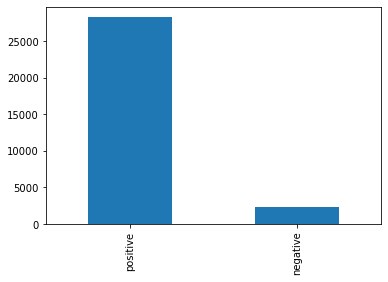

In [74]:
data['sentiment'].value_counts().plot(kind  = 'bar')

<AxesSubplot:>

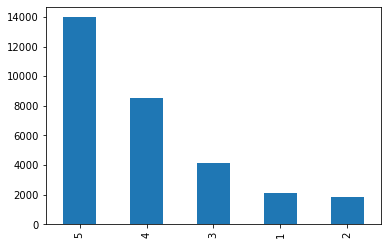

In [75]:
data['review_rating'].value_counts().plot(kind  = 'bar')

In [76]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [77]:
import warnings
warnings.filterwarnings("ignore")

In [78]:
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
 
# Get stopwords from wordcloud library
stopwords = set(STOPWORDS)

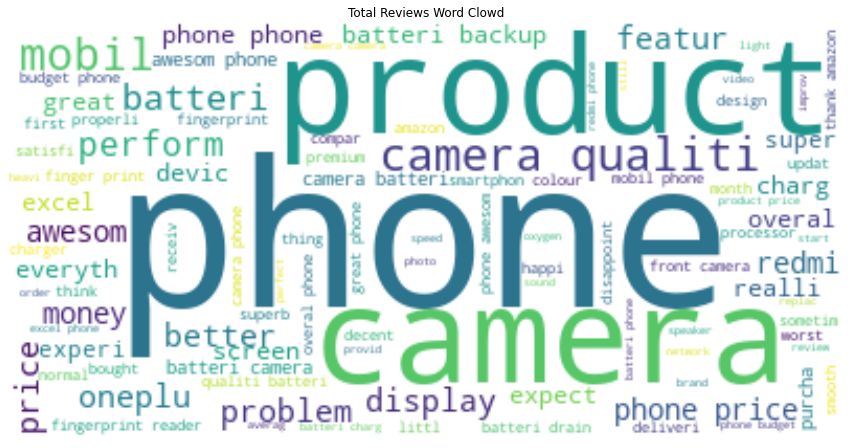

In [79]:
# join all reviews
text = " ".join(review for review in data['review_clean_str'])
 
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, min_word_length=5).generate(text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Total Reviews Word Clowd')
plt.show()